# Decision making under uncertainty

In this lecture, you learned about how the Markov decision process (MDP) framework can be extended to allow uncertainty about the states. This can be used to model a wide range of decision-making problems where there is uncertainty or noise associated with the state of the world.

We considered the example of the random dot motion discrimination task, where a subject must indicate the direction in which the majority of dots are moving. In this assignment, you will solve a two-stage formulation of this task, where the decision-maker can either make an immediate decision (i.e., at the first stage) on the basis of initial information, or choose to wait and gather further information before making their choice (i.e., at the second stage). The complete description of the problem can be found in the lecture slides and also in the original paper: http://www.gatsby.ucl.ac.uk/~dayan/papers/NDM002wc.pdf

Your task is to reproduce the plots from Figure 9 of the paper, interpret the results, and explain the steps of the solution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 0. Define the parameters of the model (0.5 pts)

In [3]:
# INSERT CODE HERE
p_x3=0.5
p_x4=0.5
mu3=6
mu4=4
sigma=1
l=10000

## 1. Updating the belief state  (2.5 pts)
The actual direction of motion ('state') is not completely observable to the subject. Hence, the subject can only rely on observations to compute the *belief* that the direction of motion is left or right (this is the posterior probability or 'belief state'). 

### 1a. Write a function that will calculate this posterior given the prior belief and an observation (the belief update). (0.5 pt)

In [45]:
# INSERT CODE BELOW
def calculate_posterior(p_x3,p_x4,mu3,mu4,sigma3,sigma4,c_beta):
    p3_c_beta_given_x3 = norm(loc=mu3, scale=sigma3)
    p4ـc_beta_given_x4 = norm(loc=mu4, scale=sigma4)
    
    l_c_beta=(p3_c_beta_given_x3.pdf(c_beta)*p_x3) / (p4ـc_beta_given_x4.pdf(c_beta) * p_x4)

    p_x3_given_c_beta= 1/ ( 1 + ( (1/l_c_beta) * (p_x4/p_x3)) )
    p_x4_given_c_beta =  1/ ( 1 + ( (l_c_beta) * (p_x3/p_x4)) ) 
    return p3_c_beta_given_x3, p4ـc_beta_given_x4, p_x3_given_c_beta,p_x4_given_c_beta


### 1b. Use this function to update the belief on the first observation at step $\beta$ and reproduce Fig 9A.  Interpret the plot. (1 pt)

Text(0.5, 1.0, 'Posterior $x_\\beta$')

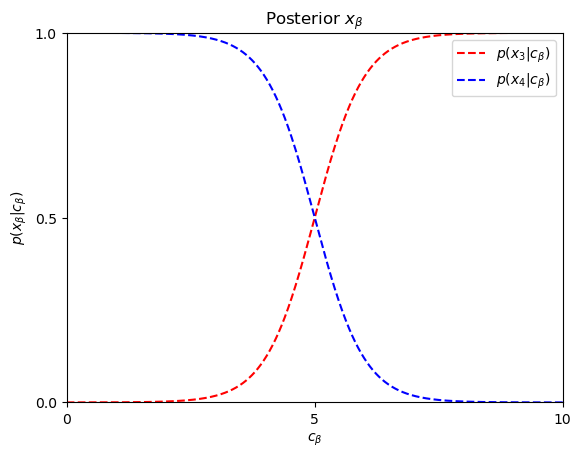

In [46]:
# INSERT CODE BELOW
c_beta=np.linspace(0,10,l)
sigma3=sigma4=sigma
p_x3_given_c_beta,p_x4_given_c_beta = calculate_posterior(p_x3,p_x4,mu3,mu4,sigma3,sigma4,c_beta)[2:]

plt.plot(c_beta,p_x3_given_c_beta, label=r'$p(x_3|c_\beta)$',color='red',linestyle='dashed')
plt.plot(c_beta,p_x4_given_c_beta, label=r'$p(x_4|c_\beta)$',color='blue',linestyle='dashed')
plt.xlim(0,10)
plt.ylim(0,1)
plt.xlabel(r'$c_\beta$')
plt.ylabel(r'$p(x_\beta|c_\beta)$')
plt.xticks([0,5,10]);
plt.yticks([0,0.5,1]);
plt.legend()
plt.title(r'Posterior $x_\beta$')




INSERT ANSWER BELOW

The figure depicts the belief states for x3 and x4, for the case when $c_\beta$ is smaller than 5, it's more probable that we are at x4 so that choosing action R is optimum, on the other hand, if $c_\beta$ is larger than 5, we would choose the left action as it's more probable that we are at state 3, lastly, if $c_\beta$ is 5 we're completely uncertain about the state we are at. 

### 1c. Write a function to update the belief on observing another sample at step $\alpha$ and reproduce Fig 9B.  Interpret the plot. (1 pt)
Hint: You will have to calculate this probability for every possible pair of observations.

In [47]:
# INSERT CODE BELOW
def calculate_posterior_alpha(p_x3,p_x4,c_beta,c_alpha,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4):
    
    p1_c_alpha_given_x1 = norm(loc=mu1, scale=sigma1)

    p2_c_alpha_given_x2 = norm(loc=mu2, scale=sigma2)
    
    p3_c_beta_given_x3, p4ـc_beta_given_x4=calculate_posterior(p_x3,p_x4,mu3,mu4,sigma3,sigma4,c_beta)[:2]
     
    p_x1_given_c_beta_and_c_alpha= p1_c_alpha_given_x1.pdf(c_alpha) * p3_c_beta_given_x3.pdf(c_beta) * p_x3
    p_x2_given_c_beta_and_c_alpha= p2_c_alpha_given_x2.pdf(c_alpha) * p4ـc_beta_given_x4.pdf(c_beta)* p_x4

    sum=p_x1_given_c_beta_and_c_alpha+p_x2_given_c_beta_and_c_alpha
    
    p_x1_given_c_beta_and_c_alpha = p_x1_given_c_beta_and_c_alpha / (sum)
    p_x2_given_c_beta_and_c_alpha= p_x2_given_c_beta_and_c_alpha / (sum) 
    
    return p1_c_alpha_given_x1,p2_c_alpha_given_x2, p_x1_given_c_beta_and_c_alpha,p_x2_given_c_beta_and_c_alpha




In [48]:
l=1000
c_beta=np.linspace(0,10,l)
c_alpha=np.linspace(0,10,l)
c_beta,c_alpha=np.meshgrid(c_beta,c_alpha)
mu1=mu3
mu2=mu4
sigma1=sigma2=sigma3=sigma4=sigma
p_x1_given_c_beta_and_c_alpha,p_x2_given_c_beta_and_c_alpha=calculate_posterior_alpha(p_x3,p_x4,c_beta,c_alpha,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4)[2:]


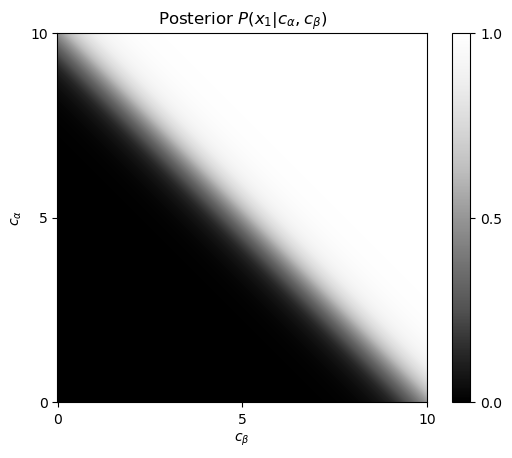

In [49]:
im=plt.imshow(p_x1_given_c_beta_and_c_alpha,origin='lower',cmap='Greys_r')
colorbar=plt.colorbar(im)
plt.xlabel(r'$c_\beta$')
plt.ylabel(r'$c_\alpha$')
plt.xticks([0,500,1000], [0,5,10])
plt.yticks([0,500,1000], [0,5,10])
colorbar.set_ticks([0,0.5,1])
plt.title(r'Posterior $P(x_1|c_\alpha,c_\beta)$');

INSERT ANSWER BELOW

The graph shows the posterior of being at state x1 after observing $c_\beta$ first, then $c_\alpha$, the white region above the diagonal indicates that we are more certain after observing high $c_\alpha$ and high $c_\beta$ that we are at state x1, the black color indicate that we are at state x2 as being at state x2 is just $1-P(x_1|c_\alpha,c_\beta)$, the grey diagonal indicates that the posterior probablity is 0.5. 

## 2. Solving for the optimal actions (7 pts)
Now that we have a way to update the belief states, we can use them to determine the best course of action at each of the steps (the 'optimal policy'). 

### 2a. When finding the optimal policy, why does it make sense to calculate the best action at the final stage $\alpha$, and work backwards? (1 pt)

INSERT ANSWER BELOW

Basically, to calculate the value function at state beta, we will need the future expected reward which are the reward obtained at stage alpha. Thus, the calculation of the value function at state beta can't be correctly computed without having the values and rewards of stage alpha which is the final stage. In previous algorithms, such as TD learning, we started at the beginning, but we required to have a full iteration to obtain the values for the future state so that we can update the initial states accordingly, but here we're not iteratively looping over the states, that being said, the calculations need to be done backwards. 

### 2b. Write a function that will calculate the value of the best action at $\alpha$ and reproduce Fig 9C. Explain what the plot shows. (1 pt)

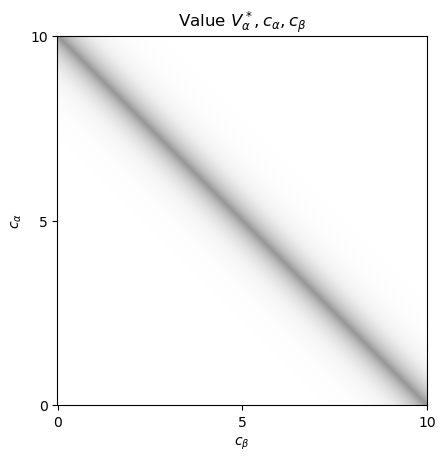

In [50]:
# INSERT CODE BELOW

V_optim = np.maximum(p_x1_given_c_beta_and_c_alpha, p_x2_given_c_beta_and_c_alpha)

im1=plt.imshow(V_optim,origin= 'lower',cmap='Greys_r',vmax=1,vmin=0)

plt.xlabel(r'$c_\beta$')
plt.ylabel(r'$c_\alpha$')
# add ticks
plt.xticks([0,500,1000], [0,5,10])
plt.yticks([0,500,1000], [0,5,10])

plt.title(r'Value $V^*_\alpha,c_\alpha,c_\beta$');
        

INSERT ANSWER BELOW

The figure shows the optimal value at stage alpha after observing and choosing action C at stage beta. 
The white region indicates a reward of 1 if we either certain the we are state x1 or x2, however, the diagonal indicates that our belief state is equiprobable, that's is the reward would be averaged out between the two states as we're not sure about the optimal action for that case. 

### 2c. Before finding the best action at $\beta$, we have one more step to do. We need the values of the best actions at $\alpha$ that we just calculated and the probability of observing $c_{\alpha}$ given $c_{\beta}$ ($P(c_{\alpha} | c_{\beta})$). Why? (1 pt)

INSERT ANSWER BELOW

AS mentioned in the paper, when we are at stage beta, deciding whether or not we it's worth choosing C before observing any $c_\alpha$, Thus to obtain the value function at stage alpha, we need to obtain the expected value with repect to the probability $P(c_\alpha|c_\beta)$ as follows, 
$V^*_{\alpha,c_\beta}=E_{p(c_\alpha|c_\beta)}[V^{*}_{\alpha,c_\alpha,c_\beta}]$, which is the mean values of transitioning from x3 to x1 or x4 to x2. 

### 2d. Write a function that will calculate $P(c_{\alpha} | c_{\beta})$ and reproduce Fig 9D. Explain how you calculated this probability and what the plot shows. (1 pt)
Hint: You will have to marginalise the posteriors over the possible states.

In [54]:
# INSERT CODE BELOW

def calculate_p_c_alpha_given_c_beta(p_x3,p_x4,mu3,mu4,sigma,c_alpha,c_beta):
    # This is simply is the probability of going to state 1 or 2 over being at state 3 or 4

    p1_c_alpha_given_x1 = norm(loc=mu3, scale=sigma).pdf(c_alpha)
    p2_c_alpha_given_x2 = norm(loc=mu4, scale=sigma).pdf(c_alpha)
    sigma3=sigma4=sigma
    p_x3_given_c_beta,p_x4_given_c_beta = calculate_posterior(p_x3,p_x4,mu3,mu4,sigma3,sigma4,c_beta)[2:]
    
    p_c_alpha_given_c_beta= (p_x3_given_c_beta* p1_c_alpha_given_x1 + p_x4_given_c_beta * p2_c_alpha_given_x2)/0.5 # 
    
    return p_c_alpha_given_c_beta


    


In [55]:
    
c_beta=np.linspace(0,10,l)
c_alpha=np.linspace(0,10,l)
c_beta,c_alpha=np.meshgrid(c_beta,c_alpha)
p_c_alpha_given_c_beta=calculate_p_c_alpha_given_c_beta(p_x3,p_x4,mu3,mu4,sigma,c_alpha,c_beta)


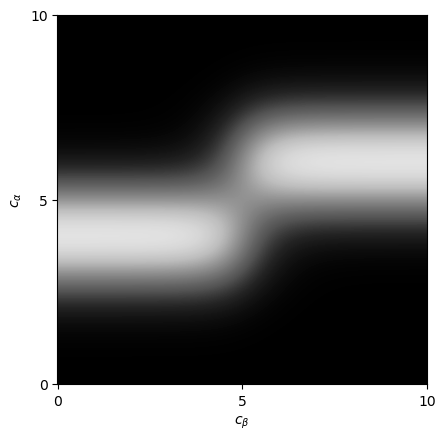

In [56]:
plt.imshow(p_c_alpha_given_c_beta,origin='lower',cmap='Greys_r',vmax=1,vmin=0)

plt.xlabel(r'$c_\beta$')
plt.ylabel(r'$c_\alpha$')
# add ticks
plt.xticks([0,500,1000], [0,5,10]);
plt.yticks([0,500,1000], [0,5,10]);


INSERT ANSWER BELOW

We know that the only way of going to x1 is from x3, and for x2 from x4, thus, by combining the probabilities p_x3_given_c_beta and p_x4_given_c_beta with the corresponding probabilities p1_c_alpha_given_x1 and p2_c_alpha_given_x2 we are able to calculate the probability p_c_alpha_given_c_beta. The division by 0.5 normalizes the result. This also was mentioned in the paper briefly by the formula $V^*_{\alpha,c_\beta}=E_{p(c_\alpha|c_\beta)}[V^{*}_{\alpha,c_\alpha,c_\beta}]$.

The plot demonstrates the relationship between c_alpha and c_beta, showing the likelihood of observing specific values of c_alpha given different of c_beta values. Certain values of c_alpha are unlikely which is denoted by the black regions, black corresponds to zero conditional probability and white correspond to 1. The distributions of c_alpha are influenced by c_beta. For instance for it's highly probable to observe both $c_\beta$>5 and $c_\alpha$ <5 but larger than 3. There is an area of uncertainty around c_beta = 5 where the distribution is ambiguous.

### 2e. We are now ready to find the best action at $\beta$. Write a function that calculates the values associated with each of the actions and reproduce Fig 9E. What does the plot tell you about what the best action is at $\beta$? (1 pt)
Hint: For action C, you will have to numerically integrate over possible observations ${c_{\alpha}}$ using the step size ($dc_{\alpha}$) you defined on your Gaussian observation distribution. 

In [65]:
def calculate_optimum_values(p_x3,p_x4,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4,c_beta,l,r_3,r_4):
    c_beta_list=np.linspace(0,10,l)

    q_values_over_C=[]
    q_values_beta =[]
    for c_beta in c_beta_list:
        
        c_alpha=np.linspace(0,10,l)
        p_x3_given_c_beta,p_x4_given_c_beta=calculate_posterior(p_x3,p_x4,mu3,mu4,sigma3,sigma4,c_beta)[2:]
        p1_c_alpha_given_x1,p2_c_alpha_given_x2, p_x1_given_c_beta_and_c_alpha,p_x2_given_c_beta_and_c_alpha= calculate_posterior_alpha(p_x3,p_x4,c_beta,c_alpha,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4)
        #
        V_optim = np.maximum(p_x1_given_c_beta_and_c_alpha, p_x2_given_c_beta_and_c_alpha)

        integral_term1=  V_optim * p1_c_alpha_given_x1.pdf(c_alpha)

        integral_term2= V_optim * p2_c_alpha_given_x2.pdf(c_alpha)
    
        V_optim_final= p_x3_given_c_beta * np.trapz(integral_term1,c_alpha) + p_x4_given_c_beta * np.trapz(integral_term2,c_alpha)
        q_values_over_C.append(-0.1 + V_optim_final)
        q_values_beta.append(np.maximum(p_x3_given_c_beta*r_3,p_x4_given_c_beta*r_4))
    return q_values_over_C,q_values_beta,c_beta_list



In [93]:
mu1=mu3
mu2=mu4
sigma1=sigma2=sigma3=sigma4=sigma
r_3=r_4=1
q_values_alpha,q_values_beta,c_beta_list=calculate_optimum_values(p_x3,p_x4,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4,c_beta,10000,r_3,r_4)


Text(0, 0.5, 'Value')

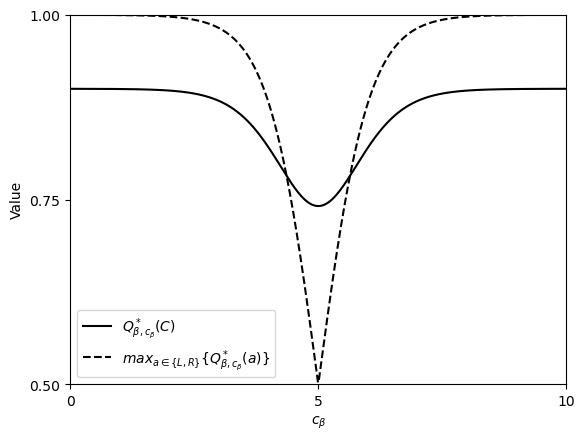

In [ ]:
# make the line solid and black
plt.plot(c_beta_list,q_values_alpha, label=r'$Q^*_{\beta,c_\beta} (C)$',color='black',linestyle='solid')
plt.plot(c_beta_list, q_values_beta, label=r'$max_{a \in \{L,R\}} \{Q^*_{\beta,c_\beta} (a)\}$',color='black',linestyle='dashed')
plt.ylim([0.5,1])
plt.xlim([0,10])
plt.xticks([0,5,10])
plt.yticks([.5,.75,1])
plt.legend()
plt.xlabel(r'$c_\beta$')
plt.ylabel('Value')

In [108]:
# Find the intersection of the two curves
# Interpolate the two curves so that each one of them is continuos 
import scipy.interpolate as interpolate
f1 = interpolate.interp1d(c_beta_list, q_values_alpha)
f2= interpolate.interp1d(c_beta_list, q_values_beta)

# find the intersection of the two curves
from scipy.optimize import fsolve

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)
x0=4.2
x1=6
intersection1=findIntersection(f1,f2,x0)
intersection2=findIntersection(f1,f2,x1)
print(intersection1,intersection2)


[4.36080623] [5.63919377]


INSERT ANSWER BELOW

For $c_\beta$ from the values of ~[4.36080623] to ~[5.63919377] the value of choosing C and wait is better than directly choosing left or right as the value drops to 0.5 as explained why in earlier comment. However, when the values of $c_\beta$ is big or large enought the value of choosing directly left or right level is better as we are certain about which states we are at. 

### 2f. What will reduce (or increase) the range of observations at $\beta$ where it is best to choose to wait for another observation (choosing C)? Can you tweak a parameter to do this and produce a plot similar to Fig 9E to show this? (2 pts)
Hint: You will have to re-run the steps with this changed parameter. 

Text(0, 0.5, 'Value')

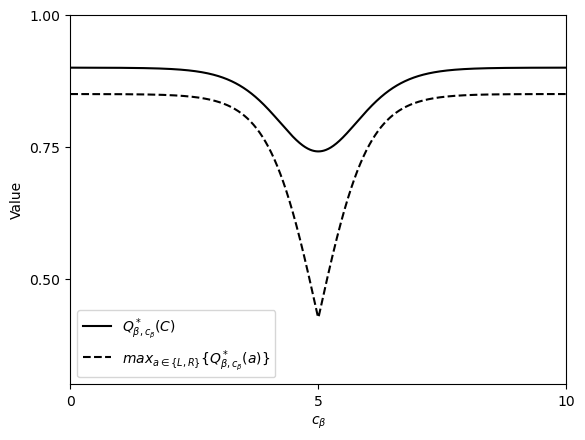

In [74]:
# INSERT CODE BELOW
# Let sigma 3 be bigger than sigma 4
r_3=0.85
r_4=0.85
q_values_alpha,q_values_beta,c_beta_list=calculate_optimum_values(p_x3,p_x4,mu1,mu2,mu3,mu4,sigma1,sigma2,sigma3,sigma4,c_beta,l,r_3,r_4)
plt.plot(c_beta_list,q_values_alpha, label=r'$Q^*_{\beta,c_\beta} (C)$',color='black',linestyle='solid')
plt.plot(c_beta_list, q_values_beta, label=r'$max_{a \in \{L,R\}} \{Q^*_{\beta,c_\beta} (a)\}$',color='black',linestyle='dashed')
plt.ylim([0.3,1])
plt.xlim([0,10])
plt.xticks([0,5,10])
plt.yticks([.5,.75,1])
plt.legend()
plt.xlabel(r'$c_\beta$')
plt.ylabel('Value')

INSERT ANSWER BELOW

If the reward at stage beta is less than 0.9, it will be always better to wait and choose on stage alpha, as the total future reward to wait is bigger than to directly choose left or right. 
Also if we are allowed to change the distribution of x3 and x4 so that the two gaussian distributions are exactly the same with the same mean, it will be always confusing to choose any action as it'll be equiprobably regardless of c_beta, and if the distributions for x1 and x2 stay the same, it'll be always better to wait and choose level C. 